In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 13.5 MB/s 


In [ ]:
from osgeo import gdal
import rasterio
import rasterio.plot
from pathlib import Path
import os
import matplotlib.pyplot as plt

In [ ]:
# Root Directory
Image_Segmentation_Path = '/content/drive/My Drive/Image Segmentation/'

# Inputs/Sources
Tiling_Path = Image_Segmentation_Path + "Tiles Sets/"

#Outputs/Destinations
resized_input = Image_Segmentation_Path + "Resized Sets/"

In [ ]:
def get_files(folder, ext="tif"):
    """get all files with a specified extension in a folder"""
    glob_path = Path(folder)
    return [file for file in glob_path.glob(f"*.{ext}")]

In [ ]:
Hillshade_Tiles_Sets = Tiling_Path + "Hillshade Tiles Sets/32x64 Tiles/00.tif"
tmp = gdal.Open(Hillshade_Tiles_Sets)

In [ ]:
array = tmp.ReadAsArray()
array.shape

(177, 201)

In [ ]:
p = Path(Tiling_Path)
os.listdir(str(p))

['DEM Tiles Sets',
 'Annotated Tiles Sets',
 'Slope Tiles Sets',
 'Aspect Tiles Sets',
 'Hillshade Tiles Sets']

In [ ]:
resized_sets_paths_list = []
for dir in [x for x in p.iterdir() if x.is_dir()]:
  sets_name = resized_input+dir.name+'/'
  Path(sets_name).mkdir(parents=True, exist_ok=True)
  tiles_files_list = []
  for tiles_dir in [y for y in Path(dir).iterdir() if y.is_dir()]:
    resized_sets = sets_name + tiles_dir.name + '/'
    Path(resized_sets).mkdir(parents=True, exist_ok=True)
    tiles_files_list.append(resized_sets)
    for dem_file in get_files(tiles_dir):
      # dem = gdal.Open(os.fspath(dem_file))
      output = resized_sets + dem_file.name
      # gdal.Translate(output, dem, width = 177, height = 201)
  resized_sets_paths_list.append(tiles_files_list)
resized_sets_paths_list

[['/content/drive/My Drive/Image Segmentation/Resized Sets/DEM Tiles Sets/2x4 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/DEM Tiles Sets/4x8 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/DEM Tiles Sets/8x16 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/DEM Tiles Sets/16x32 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/DEM Tiles Sets/32x64 Tiles/'],
 ['/content/drive/My Drive/Image Segmentation/Resized Sets/Annotated Tiles Sets/2x4 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/Annotated Tiles Sets/8x16 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/Annotated Tiles Sets/16x32 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/Annotated Tiles Sets/32x64 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/Annotated Tiles Sets/4x8 Tiles/'],
 ['/content/drive/My Drive/Image Segmentation/Resized Sets/Slope Tiles Sets/2x4 Tiles/',

(201, 177)
(201, 177)
(201, 177)
(201, 177)
(201, 177)
(201, 177)
(201, 177)
(201, 177)


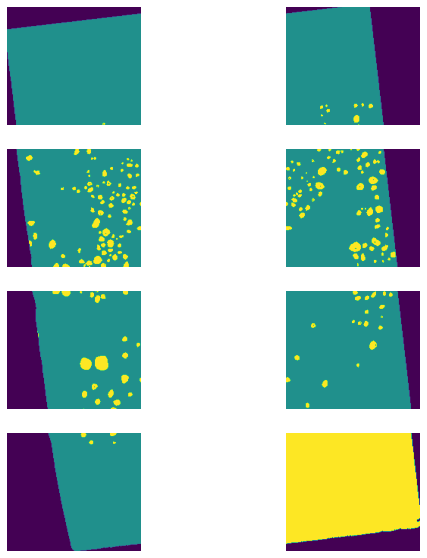

In [ ]:
# Plot one resized set path

# 8x16 tiles ==> subplot(16,8)
origin_2x4_tiles = resized_sets_paths_list[1][0]
fig, ax = plt.subplots(4, 2, figsize=(10, 10))
plt.subplots_adjust(wspace =0.0001)
ax = ax.flatten('F')
# fig.tight_layout()
i=0
for file in get_files(origin_2x4_tiles):
  with rasterio.open(file) as tile:
    print(tile.shape)
    ax[i].axis('off')
    rasterio.plot.show(tile, ax=ax[i])
    i+=1